Step - 1: Understanding Data:

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AI_sem-3/diabetes.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
# (e.g., check data types, missing values, summary statistics).
eda = df.describe()
eda

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [ ]:
handle_missing = df.dropna()
handle_missing

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


3. Feature Engineering:

In [ ]:
import numpy as np
# separating the feature matrix (X) and target variable (y).
feature=df.drop('Outcome',axis=1)
target=df['Outcome']

In [ ]:
# Perform a train - test split from scratch using a 70% − 30% ratio.
import numpy as np

# separating features (X) and target (y)
X = df.drop(columns=['Outcome']).values  # converting features to NumPy array
y = df['Outcome'].values  # converting target to NumPy array

In [ ]:
# function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices
    test_split_size = int(len(X) * test_size)  # Calculate the size of the test set
    test_indices = indices[:test_split_size]  # Indices for the test set
    train_indices = indices[test_split_size:]  # Indices for the training set
    X_train, X_test = X[train_indices], X[test_indices]  # Split features
    y_train, y_test = y[train_indices], y[test_indices]  # Split target

    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


4. Implement KNN:

In [ ]:
#Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
# Function to compute Euclidean distance
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
      raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance
# function to implement KNN algorithm
def knn(X_train, y_train, X_test, k=3):
    predictions = []

    # Iterate through all the test data points
    for test_point in X_test:
        # calculating the distance from the test point to all training data points
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_indices = np.argsort(distances)[:k] # sorting the distances and searching the k nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices] # the labels of the k nearest neighbors
        most_common_label = np.bincount(k_nearest_labels).argmax() # prediction of the label by majority voting
        predictions.append(most_common_label)

    return np.array(predictions)

In [ ]:
# function to predict class for a single query
def knn_predict_single(query,X_train,y_train,k):

  distances= [euclidean_distance(query,x) for x in X_train] #calculating the distance from query to all train points
  sorted_indices=np.argsort(distances)  #Sorting the elements of the array and returning its indices
  nearest_indices=sorted_indices[:k]  #Get indices of k nearest neighbours
  nearest_labels=[y_train[i] for i in nearest_indices]# corresponding labels of the nearest neighbors
  count=np.bincount(nearest_labels)# counting occurences of each label
  prediction=np.argmax(count)#the label with maximum count

  return prediction

In [ ]:
# function to predict classes for all test samples.
def knn_predict(X_test, X_train, y_train, k):
  #Calling the knn_predict_single function for each test point x
  predictions=[knn_predict_single(x,X_train,y_train,k) for x in X_test]
  return np.array(predictions)

In [ ]:
# function to compute accuracy
def compute_accuracy(y_true,y_pred):

  correct_predictions=np.sum(y_true==y_pred)
  total_predictions=len(y_true)

  accuracy=(correct_predictions/total_predictions)*100
  return accuracy

In [ ]:
# performing prediction on the entire test set
try:
  predictions=knn_predict(X_test, X_train, y_train, k=3)# making predictions on the entire test set
  accuracy=compute_accuracy(y_test,predictions)
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexprected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 67.39%


Problem - 2 - Experimentation:
1. Repeat the Classification Task:


In [ ]:
# training data
# min and max value along each feature
X_min_train = X_train.min(axis=0)
X_max_train = X_train.max(axis=0)
#scaling data
X_train_scaled = (X_train - X_min_train) / (X_max_train - X_min_train)
print(X_train_scaled)

[[0.29411765 0.38693467 0.67213115 ... 0.53353204 0.03330487 0.23333333]
 [0.05882353 0.47738693 0.49180328 ... 0.3561848  0.07771136 0.01666667]
 [0.29411765 0.52763819 0.59016393 ... 0.54992548 0.03458582 0.11666667]
 ...
 [0.58823529 0.50753769 0.70491803 ... 0.67958271 0.45175064 0.28333333]
 [0.         0.70854271 0.         ... 0.6318927  0.05422716 0.13333333]
 [0.         0.6281407  0.78688525 ... 0.33532042 0.07856533 0.        ]]


In [ ]:
# testing data
# min and max value among each feature
X_min_test = X_test.min(axis=0)
X_max_test = X_test.max(axis=0)
X_test_scaled = (X_test - X_min_test) / (X_max_test - X_min_test)
print(X_test_scaled)

[[0.46153846 0.27205882 0.50877193 ... 0.59336824 0.22619048 0.47826087]
 [0.15384615 0.375      0.65789474 ... 0.62303665 0.03968254 0.        ]
 [0.15384615 0.34558824 0.56140351 ... 0.53752182 0.0462963  0.        ]
 ...
 [0.30769231 0.35294118 0.56140351 ... 0.60732984 0.54034392 0.10869565]
 [0.         0.48529412 0.70175439 ... 0.63350785 0.47354497 0.04347826]
 [0.46153846 0.32352941 0.61403509 ... 0.53752182 0.02248677 0.34782609]]


In [ ]:
# performing prediction on the entire test set
try:
  # predicting on the entire scaled test set
  predictions=knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)

  accuracy=compute_accuracy(y_test,predictions)# Computing the accuracy
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexprected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 70.87%


2. Comparative Analysis: Compare the Results -


In [ ]:
# • Compare the accuracy and performance of the kNN model on the original dataset from problem 1
# versus the scaled dataset.
import matplotlib.pyplot as plt
from timeit import timeit

# dictionary to store accuracies of original dataset
accuracies_original={}

# Iterating over each value of k in k_values
for k in range(1,16):
  # Predicting using the current value of k
  predictions=knn_predict(X_test, X_train, y_train,k=k)
  accuracy=compute_accuracy(y_test,predictions)

  #Store the accuracy as key and value in dictionary
  accuracies_original[k]=accuracy
  print(f"Accuracy for k={k}: {accuracy:.2f}")

Accuracy for k=1: 68.70
Accuracy for k=2: 72.61
Accuracy for k=3: 67.39
Accuracy for k=4: 72.17
Accuracy for k=5: 68.70
Accuracy for k=6: 70.00
Accuracy for k=7: 69.13
Accuracy for k=8: 71.30
Accuracy for k=9: 70.00
Accuracy for k=10: 71.74
Accuracy for k=11: 73.04
Accuracy for k=12: 73.91
Accuracy for k=13: 74.35
Accuracy for k=14: 72.61
Accuracy for k=15: 73.91


In [ ]:
# accuracy of scaled dataset
scaled_accuracy={}

# iterating over each value of k in k_values
for k in range(1,16):
  # predicting using the current value of k
  predictions=knn_predict(X_test_scaled, X_train_scaled, y_train,k=k)

  accuracy=compute_accuracy(y_test,predictions)

  #Store the accuracy in dictionary
  scaled_accuracy[k]=accuracy

  print(f"Accuracy for k={k}: {accuracy:.2f}")

Accuracy for k=1: 70.00
Accuracy for k=2: 70.43
Accuracy for k=3: 70.87
Accuracy for k=4: 71.74
Accuracy for k=5: 71.74
Accuracy for k=6: 73.48
Accuracy for k=7: 71.74
Accuracy for k=8: 74.35
Accuracy for k=9: 74.35
Accuracy for k=10: 74.35
Accuracy for k=11: 74.78
Accuracy for k=12: 73.04
Accuracy for k=13: 74.78
Accuracy for k=14: 74.78
Accuracy for k=15: 76.09


In [ ]:
# time taken for original dataset
original_time=[]
# iterating over the values of k in k_values
for k in range(1, 16):
    # Creating the statement string to time the function
    stmt = f"knn_predict(X_test, X_train, y_train, k={k})"

    # Timing the knn_predict function with the current k value
    time_taken = timeit(stmt, globals=globals(), number=5)
    original_time.append(time_taken)
    print(f"Time taken for k={k}: {time_taken:.6f} seconds")

Time taken for k=1: 8.304671 seconds
Time taken for k=2: 4.226341 seconds
Time taken for k=3: 5.226011 seconds
Time taken for k=4: 5.190734 seconds
Time taken for k=5: 4.062101 seconds
Time taken for k=6: 4.979651 seconds
Time taken for k=7: 5.011609 seconds
Time taken for k=8: 5.460120 seconds
Time taken for k=9: 7.050012 seconds
Time taken for k=10: 4.564456 seconds
Time taken for k=11: 4.596538 seconds
Time taken for k=12: 5.735846 seconds
Time taken for k=13: 5.370906 seconds
Time taken for k=14: 6.538798 seconds
Time taken for k=15: 4.520878 seconds


In [ ]:
# time taken for scaled dataset
time_scaled=[]
# iterating over the values of k in k_values
for k in range(1, 16):

    stmt = f"knn_predict(X_test_scaled, X_train_scaled, y_train, k={k})"  # Creating statement string to time the function
    time_taken = timeit(stmt, globals=globals(), number=5)
    time_scaled.append(time_taken)
    print(f"Time taken for k={k}: {time_taken:.6f} seconds")

Time taken for k=1: 5.983735 seconds
Time taken for k=2: 4.821674 seconds
Time taken for k=3: 4.127537 seconds
Time taken for k=4: 5.903165 seconds
Time taken for k=5: 4.121856 seconds
Time taken for k=6: 4.224241 seconds
Time taken for k=7: 5.862591 seconds
Time taken for k=8: 4.076287 seconds
Time taken for k=9: 4.221739 seconds
Time taken for k=10: 6.057908 seconds
Time taken for k=11: 4.035310 seconds
Time taken for k=12: 5.410261 seconds
Time taken for k=13: 6.505583 seconds
Time taken for k=14: 4.196721 seconds
Time taken for k=15: 4.140072 seconds


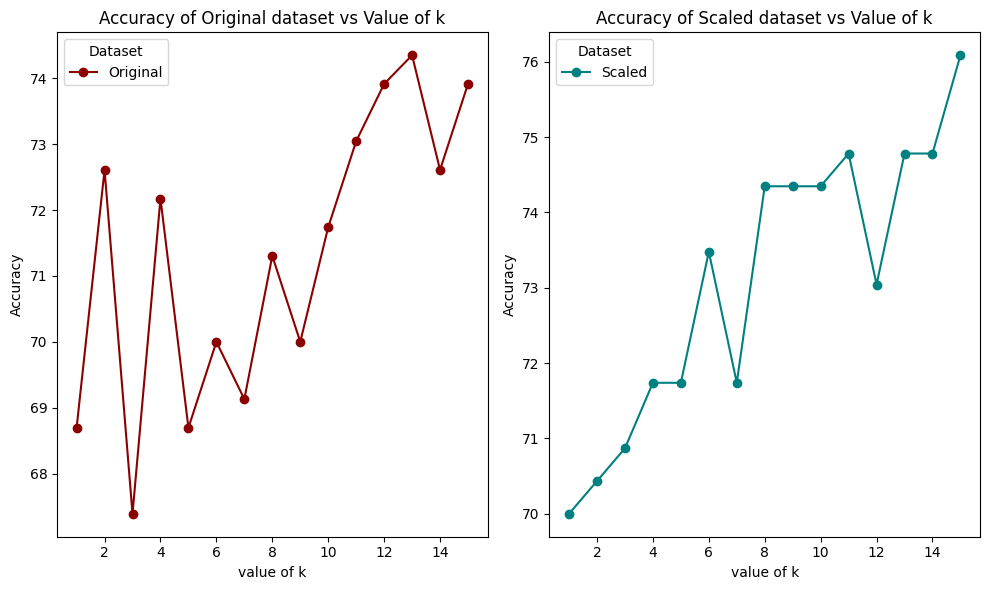

In [ ]:
# the range of k values for graph
k_values=range(1,16)
# Plot for Accuracy line charts
plt.figure(figsize=(10,6))

#  original dataset vs value of k
plt.subplot(1,2,1)
plt.plot(k_values,list(accuracies_original.values()),marker='o',color='darkred',label="Original")
plt.xlabel('value of k')
plt.ylabel('Accuracy')
plt.title('Accuracy of Original dataset vs Value of k')
plt.legend(title="Dataset")

# scaled dataset vs value of k
plt.subplot(1,2,2)
plt.plot(k_values,list(scaled_accuracy.values()),marker='o',color="teal",label="Scaled")
plt.xlabel('value of k')
plt.ylabel('Accuracy')
plt.title('Accuracy of Scaled dataset vs Value of k')
plt.legend(title="Dataset")

plt.tight_layout()
plt.show()

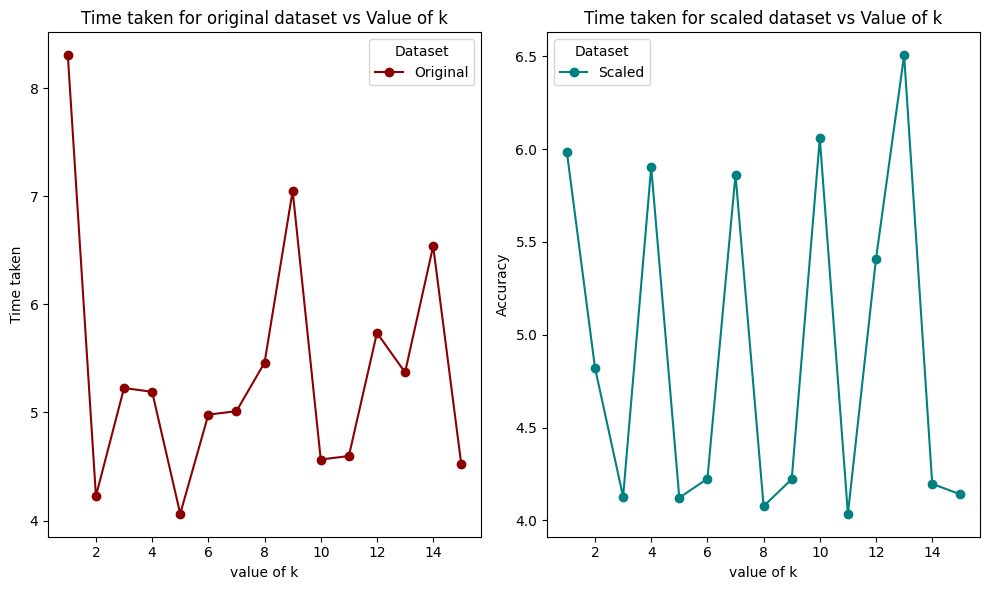

In [ ]:
# Plot for Time taken line charts
plt.figure(figsize=(10,6))

# original dataset vs value of k
plt.subplot(1,2,1)
plt.plot(k_values,original_time,marker='o',color='darkred',label="Original")
plt.xlabel('value of k')
plt.ylabel('Time taken')
plt.title('Time taken for original dataset vs Value of k')
plt.legend(title="Dataset")

# scaled dataset vs value of k
plt.subplot(1,2,2)
plt.plot(k_values,time_scaled,marker='o',color='teal',label="Scaled")
plt.xlabel('value of k')
plt.ylabel('Accuracy')
plt.title('Time taken for scaled dataset vs Value of k')
plt.legend(title="Dataset")

plt.tight_layout()
plt.show()